<a href="https://colab.research.google.com/github/EveTLynn/Packt-Data-Analysis-Workshop/blob/main/C6_Analysis_of_Credit_Card_Defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# .1. Introduction

We will analyze credit card payments of customers and use their transactional data to study the characteristics of the customers who are most likely to default, eventually building a profile of these customers. This profile will act as a criterion for the bank or lending facility to detect potential defaulters and take appropriate actions in a timely manner.

The dataset's features can be explained here:

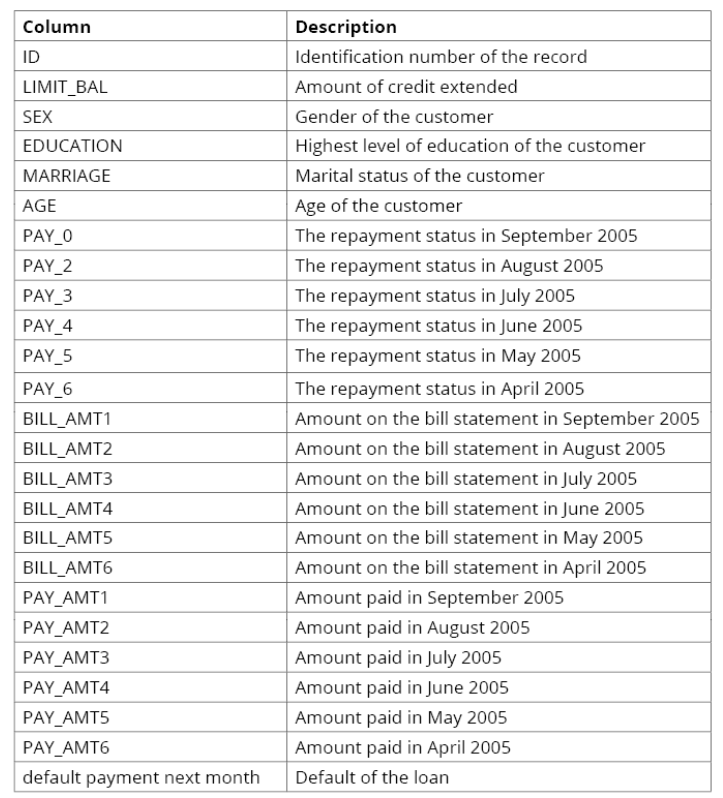

# .2. Import data and libraries

In [ ]:
!pip install wget
import wget

In [ ]:
url = "https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip"
wget.download(url)
!unzip {"/content/default+of+credit+card+clients.zip"} -d {"/content"}

Archive:  /content/default+of+credit+card+clients.zip
replace /content/default of credit card clients.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_excel('/content/default of credit card clients.xls', header=1)
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# some descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# .3. Data Preprocessing

In [ ]:
# see the unique values from some columns
print('SEX ' + str(sorted(df['SEX'].unique())))
print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))
print('PAY_0 ' + str(sorted(df['PAY_0'].unique())))
print('default.payment.next.month ' + str(sorted(df['default payment next month'].unique())))

SEX [1, 2]
EDUCATION [0, 1, 2, 3, 4, 5, 6]
MARRIAGE [0, 1, 2, 3]
PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default.payment.next.month [0, 1]


The EDUCATION column has 7 unique values, but as per our data description, we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4

In [ ]:
fill = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[fill, 'EDUCATION'] = 4

print('EDUCATION ' + str(sorted(df['EDUCATION'].unique())))

EDUCATION [1, 2, 3, 4]


Similarly, in the MARRIAGE column, according to the data description, we should have 3 unique values. But here, we have 4 values in our data. As per our data description, the MARRIAGE column should have three subcategories. So, we combine
category 0 with category 2 (Single)

In [ ]:
fill = (df.MARRIAGE == 0)
df.loc[fill, 'MARRIAGE'] = 2

print('MARRIAGE ' + str(sorted(df['MARRIAGE'].unique())))

MARRIAGE [1, 2, 3]


Rename the PAY_0 column to PAY_1 and the default payment next month column to DEFAULT to maintain consistency with the naming of other columns.

In [ ]:
df = df.rename(columns={'default payment next month': 'DEFAULT',
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# .4. Exploratory Data Analysis

## 4.1. Univariate analysis

We will be analyzing the categorical columns (DEFAULT, SEX, EDUCATION, and MARRIAGE) to mine useful information about the data

In [ ]:
cols = ['DEFAULT', 'SEX', 'EDUCATION', 'MARRIAGE']
for col in cols:
  print(df[col].value_counts())
  print()

0    23364
1     6636
Name: DEFAULT, dtype: int64

2    18112
1    11888
Name: SEX, dtype: int64

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64



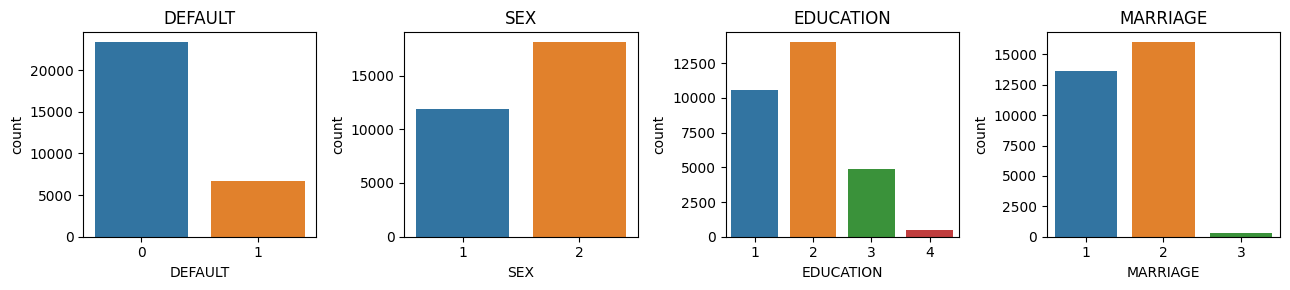

In [ ]:
# let's visualize
plt.figure(figsize=(13, 3))
for index, col in enumerate(cols):
  plt.subplot(1, 4, index + 1)
  sns.countplot(x=col, data=df)
  plt.title(col)

plt.tight_layout()

From the preceding output, we can see that:

*   DEFAUT: around 6636 customers have defaulted out of 30000 people, which is around 22%
*   SEX: 1 represents male and 2 represents female, quite balance ratio 18112 females : 11888 males in the given dataset
*   EDUCATION: 1-Graduate School, 2-University, 3-High School, 4- Others.Most of our customers either went to graduate school or university.
*   MARRIAGE: 1-Married, 2-Single, 3-Divorced. Our dataset has a high number of people who are single (unmarried), closely followed by people who are married





## 4.2. Bivariate Analysis

Let evaluate the relationship of some columns with DEFAULT

### 4.2.1. Education, marriage vs defaut

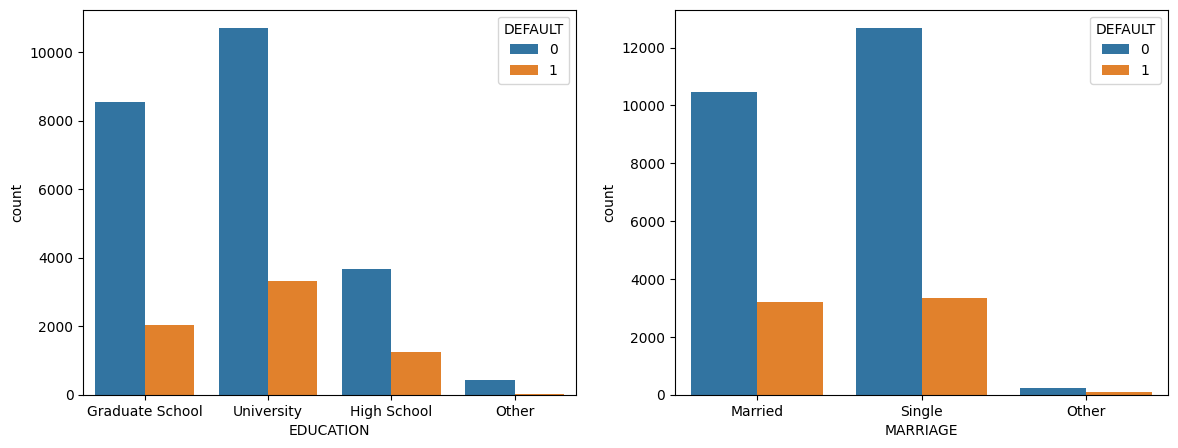

In [ ]:
plt.figure(figsize=(14, 5))
# Education
plt.subplot(1, 2, 1)
edu = sns.countplot(x='EDUCATION', hue='DEFAULT', data=df)
edu.set_xticklabels(['Graduate School','University','High School','Other'])

# marriage
plt.subplot(1, 2, 2)
marriage = sns.countplot(x="MARRIAGE", hue='DEFAULT', data=df)
marriage.set_xticklabels(['Married','Single','Other'])
plt.show()

In [ ]:
# cross tabulation
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index')

DEFAULT,0,1
EDUCATION,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513


In [ ]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062
All,0.778800,0.221200


With the help of the crosstab function, we see that customers who belong to the Other subcategory have a higher percentage of defaults than the others.

### 4.2.2. PAY_1 vs default

The measurement scale for the repayment status is as follows:
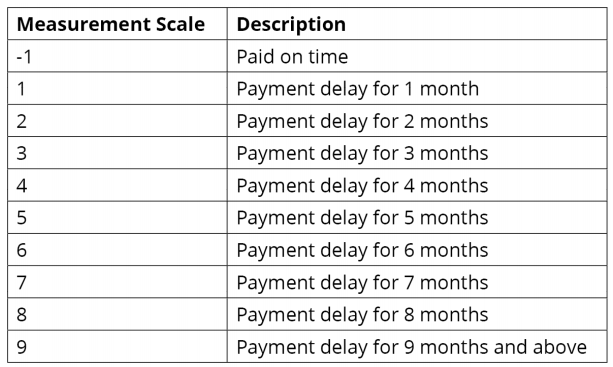

In [ ]:
pd.crosstab(df.PAY_1,df.DEFAULT,margins=True)

DEFAULT,0,1,All
PAY_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


From the output of the crosstab function, we can see that the maximum count of defaults falls under subcategory 2—that is, a payment delay for the last 2 months. This implies that a customer who has missed payments for 2 continuous months has a high probability of default.

### 4.2.3. Balance versus DEFAULT
The balance is the amount given as credit. It includes both the individual consumer's credit and their family's (supplementary) credit.

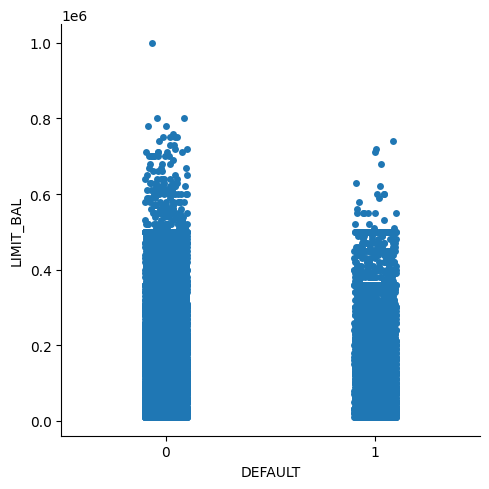

In [ ]:
sns.catplot(x="DEFAULT", y="LIMIT_BAL", jitter=True, data=df)

From the preceding plot, we can infer that customers with higher balances have a lower likelihood of default than customers with lower balance amounts.

### 4.2.4. Age and default

In [ ]:
pd.crosstab(df.AGE,df.DEFAULT)

DEFAULT,0,1
AGE,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


In [ ]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


# .5. Modelling


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

## 5.1 Prepare data

We need to one-hot encoding categorical features using `pd.get_dummies`.

When drop_first=True, one of the dummy variables for each feature is dropped. This is done because:
- Redundancy: If all dummy variables are kept, there's perfect collinearity (one variable can be perfectly predicted from the others), which can cause issues in model fitting and interpretation.
- Baseline Representation: The dropped variable acts as a reference or baseline category. The remaining dummy variables indicate the presence or absence of other categories relative to this baseline.

In [ ]:
# one-hot encoding categorical features
def process_categorical_features(df):
    dummies_education = pd.get_dummies(df.EDUCATION, prefix="EDUCATION", drop_first=True)
    dummies_marriage = pd.get_dummies(df.MARRIAGE, prefix="MARRIAGE", drop_first=True)
    df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
    return pd.concat([df, dummies_education, dummies_marriage], axis=1)
df = process_categorical_features(df)
df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,1,20000,2,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0
1,2,120000,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,1,0
2,3,90000,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,1,0
3,4,50000,2,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,0,0
4,5,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0


In [ ]:
# drop ID columns and see the correlation of all features
df = df.drop('ID', axis=1)
corr_matrix = df.corr(). abs()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-119-dcdbd19c9e27>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
LIMIT_BAL,1.00,0.02,0.14,0.27,0.30,0.29,0.27,0.25,0.24,0.29,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,0.15,0.15,0.14,0.01,0.09,0.06
SEX,0.02,1.00,0.09,0.06,0.07,0.07,0.06,0.06,0.04,0.03,0.02,0.02,0.02,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.04,0.03,0.01,0.01,0.03,0.00
AGE,0.14,0.09,1.00,0.04,0.05,0.05,0.05,0.05,0.05,0.06,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01,0.08,0.23,0.01,0.47,0.08
PAY_1,0.27,0.06,0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.19,0.18,0.18,0.18,0.18,0.08,0.07,0.07,0.06,0.06,0.06,0.32,0.10,0.06,0.02,0.01,0.02
PAY_2,0.30,0.07,0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.23,0.22,0.22,0.22,0.22,0.08,0.06,0.06,0.05,0.04,0.04,0.26,0.12,0.06,0.03,0.02,0.01
PAY_3,0.29,0.07,0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.23,0.23,0.23,0.22,0.00,0.07,0.05,0.05,0.04,0.04,0.24,0.12,0.06,0.03,0.03,0.02
PAY_4,0.27,0.06,0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.24,0.25,0.24,0.24,0.01,0.00,0.07,0.04,0.03,0.03,0.22,0.11,0.06,0.03,0.03,0.02
PAY_5,0.25,0.06,0.05,0.51,0.62,0.69,0.82,1.00,0.82,0.21,0.24,0.27,0.27,0.26,0.01,0.00,0.01,0.06,0.03,0.02,0.20,0.10,0.05,0.03,0.03,0.01
PAY_6,0.24,0.04,0.05,0.47,0.58,0.63,0.72,0.82,1.00,0.21,0.24,0.27,0.29,0.29,0.00,0.01,0.01,0.02,0.05,0.03,0.19,0.10,0.04,0.04,0.03,0.02
BILL_AMT1,0.29,0.03,0.06,0.19,0.23,0.21,0.20,0.21,0.21,1.00,0.89,0.86,0.83,0.80,0.14,0.10,0.16,0.16,0.17,0.18,0.02,0.03,0.02,0.04,0.02,0.01


In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

[]

In [ ]:
# Drop features
df.drop(to_drop, axis=1, inplace=True)

## 5.2 Trainning

In [ ]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

Since we the labels are highly skewed, the model may not perform well. Let's try running the model without adressing the imbalance

In [ ]:
X = df.drop(columns='DEFAULT', axis=1)
y= df['DEFAULT']
X.shape, y.shape

((30000, 25), (30000,))

In [ ]:
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
print("Size of train dataset: {} rows".format(X_train.shape[0]))
print("Size of test dataset: {} rows".format(X_test.shape[0]))

Size of train dataset: 22500 rows
Size of test dataset: 7500 rows


In [ ]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }


# instantiate the classifier
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# predict on test set
predictions = xgb_clf.predict(X_test)

In [ ]:
# accuracy
print("Model Accuray: {:.2f}%".format(100*xgb_clf.score(X_test, y_test)))

Model Accuray: 82.00%


In [ ]:
# classification report
cr = metrics.classification_report(y_test, predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.66      0.36      0.46      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



The result for label 1 isn't very good. Let try upsampling.

## Oversampling with SMOTE

In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 23364, 0: 23364})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':100
        }


# instantiate the classifier
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# classification report
cr = metrics.classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4613
           1       0.83      0.77      0.80      4733

    accuracy                           0.81      9346
   macro avg       0.81      0.81      0.81      9346
weighted avg       0.81      0.81      0.81      9346



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

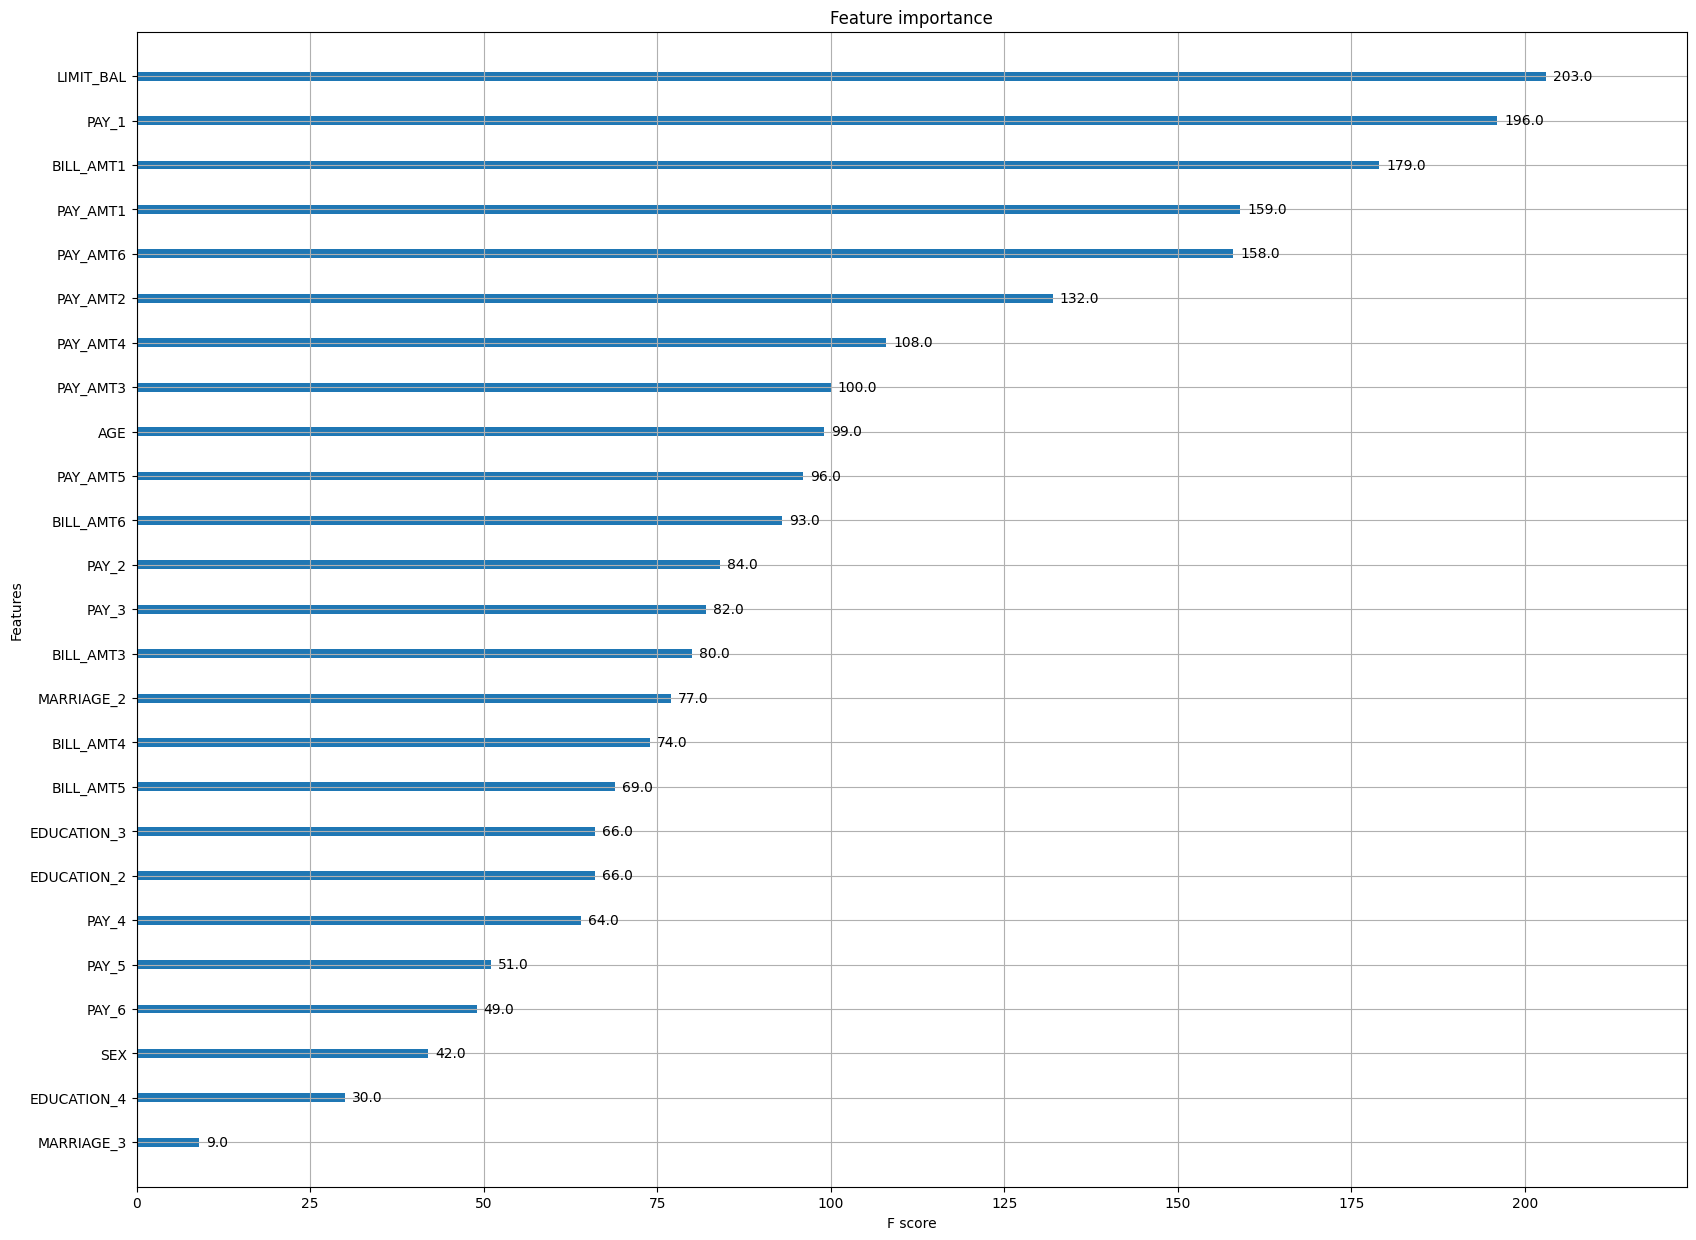

In [ ]:
# check the features importance
plt.figure(figsize=(20,15))
xgb.plot_importance(xgb_clf, ax=plt.gca())

In [ ]:
# visualize the tree built by XGBoost
plt.figure(figsize=(20,15))
xgb.plot_tree(xgb_clf, ax=plt.gca())

In [ ]:
# get some characteristics of the model
print("Number of boosting trees: {}".format(xgb_clf.n_estimators))
print("Max depth of trees: {}".format(xgb_clf.max_depth))
print("Objective function: {}".format(xgb_clf.objective))

Number of boosting trees: 100
Max depth of trees: 5
Objective function: binary:logistic


# References
- https://blog.cambridgespark.com/getting-started-with-xgboost-3ba1488bb7d4